# EDA and Cleaning

## Prepration

**Requirments for EDA on python==3.11**


```
    nltk==3.9.1
    wordcloud==1.9.4
    text-unidecode==1.3
    pandas==2.2.2
    numpy==1.26.4
    sklearn-pandas==2.2.0
    openai==1.61.1
    matplotlib==3.10.0
    pydantic==2.10.6

```




In [11]:
%cd /content/drive/MyDrive/Project/crypto-sentiment
%ls data

/content/drive/MyDrive/Project/crypto-sentiment
processed/  raw/


In [12]:
# Installing required packages
!pip install wordcloud nltk unidecode regex -q

In [13]:
# Path to data and path to save processed ones

tweet_path = './data/raw/tweets.csv'
eth_path = './data/raw/ETH_data.csv'

train_path = './data/processed/train.csv'
val_path = './data/processed/val.csv'
test_path = './data/processed/test.csv'

train_aug_path = './data/processed/train_augmented.csv'
val_aug_path = './data/processed/val_augmented.csv'
test_aug_path = './data/processed/test_augmented.csv'


In [15]:
# importing required packages

import pandas as pd
import re
import regex
import unicodedata
import random
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from collections import Counter

## Tweet dataset

A quick view of tweets

In [16]:
tweets_df = pd.read_csv(tweet_path)
tweets_df

,id,text,label,timestamp,account_id,is_crypto_tweet,text_len
0,76249,👀,1,2024-10-01 01:20:17+00:00,9849,NaN,2
1,76106,🧐,1,2024-10-01 06:53:54+00:00,9836,NaN,2
2,75966,💀,0,2024-10-01 11:32:27+00:00,9922,NaN,2
3,75889,✍️,1,2024-10-01 13:51:38+00:00,9918,NaN,2
4,75338,gm,1,2024-10-02 05:49:50+00:00,9854,NaN,2
...,...,...,...,...,...,...,...
2219,3554573,Wow. The Agent Narrative is burning hot today!...,2,2024-12-04 08:11:41+00:00,58725,NaN,1692
2220,76019,Many problems in trading come from being condi...,1,2024-10-01 09:53:09+00:00,9878,NaN,1699
2221,921837,new Department of Government Efficiency (D.O.G...,2,2024-11-13 03:02:29+00:00,153328,NaN,2336
2222,1615998,The core STRK staking infrastructure has been ...,2,2024-11-25 08:06:47+00:00,15585,NaN,2633


Dataframe info:

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2224 non-null   int64 
 1   text             2224 non-null   object
 2   label            2224 non-null   int64 
 3   timestamp        2224 non-null   object
 4   account_id       2224 non-null   int64 
 5   is_crypto_tweet  42 non-null     object
 6   text_len         2224 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 121.8+ KB


Checking if the column could be helpfull:

In [ ]:
print(tweets_df.is_crypto_tweet.unique())
tweets_df.is_crypto_tweet.value_counts()

[nan 'FALSE' '0' 'TRUE']


,count
is_crypto_tweet,
FALSE,22
0,19
TRUE,1


is_crypto_tweet => not provided in most samples => drop all

In [ ]:
len(tweets_df.account_id.unique())

406

account_id => In real case for this project, authers not provided but maybe in some projects can be helpful => drop all

Distribution of tweet lenghts:

In [ ]:
tweets_df.text_len.describe()

,text_len
count,2224.000000
mean,101.227068
std,158.930272
min,2.000000
25%,27.000000
50%,62.000000
75%,133.000000
max,3655.000000


In [ ]:
tweets_df[tweets_df.text_len < 10]['label'].value_counts()

,count
label,
1,148
2,38
0,13


**Plot** of text len distribution:

<Axes: >

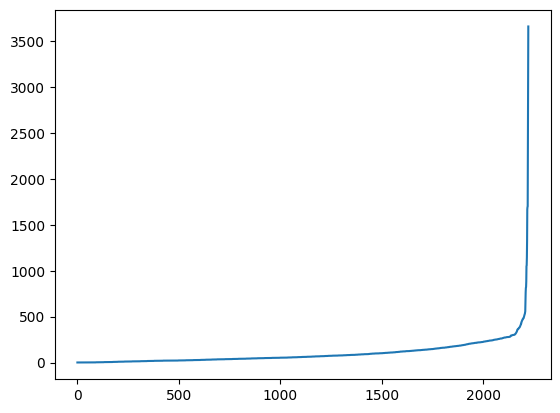

In [ ]:
tweets_df.text_len.plot()

**Check frequency of each label:**

In [ ]:
tweets_df.label.value_counts()

,count
label,
1,1133
2,734
0,357


=> It seems the dataset in imbalanced

In [ ]:
tweets_df.groupby('label').text_len.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,357.0,99.240896,89.395242,2.0,41.0,71.0,133.0,883.0
1,1133.0,86.756399,117.884139,2.0,23.0,52.0,117.0,1699.0
2,734.0,124.529973,224.481014,2.0,32.0,75.0,155.0,3655.0


## ETH dataset

A quick view of tweets

In [ ]:
eth_df = pd.read_csv(eth_path)
eth_df

,id,text,sentiment_analysis,detected_symbols
0,7904170,𝗔𝗻𝗼𝘁𝗵𝗲𝗿 𝗮𝗶𝗿𝗱𝗿𝗼𝗽 𝘁𝘂𝘁𝗼𝗿𝗶𝗮𝗹 𝘀𝗵𝗮𝗿𝗲𝗱 𝗯𝘆 𝗰𝗼𝗺𝗺𝘂𝗻𝗶𝘁𝘆 𝗺...,2024-12-22 13:24:11+00:00,"['ETH', 'USDC', 'ENA', 'HYPE', 'USUAL', 'USR']"
1,7400934,really want to see us take a crack at 3k ETH b...,2024-12-20 10:52:51+00:00,['ETH']
2,12608909,"Back in a half risk $ETH long.\n\nEntry 3250~,...",2025-01-11 11:03:23+00:00,['ETH']
3,8855541,BREAKING: @pumpdotfun FLIPS ETHEREUM IN 24H RE...,2024-12-28 03:26:12+00:00,['ETH']
4,9486940,BASE.ETH,2024-12-31 05:44:23+00:00,['ETH']
...,...,...,...,...
3483,10135666,Very simple \n\nFlip box and altcoins pump a l...,2025-01-02 21:19:04+00:00,['ETH']
3484,11680542,Prediction: \n\nWe all know @doodles is closel...,2025-01-08 14:55:56+00:00,"['ETH', 'ANIME']"
3485,8737856,☕️ GM! Here are the top events in #Crypto for ...,2024-12-27 13:00:42+00:00,"['BTC', 'ETH', 'DOGE', 'FLOKI', 'BGB', 'DAO', ..."
3486,11990786,☕️ GM! Here are the top events in #Crypto from...,2025-01-09 13:10:18+00:00,"['BTC', 'ETH', 'SOL', 'XRP', 'STRK', 'BAN']"


In [ ]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3488 non-null   int64 
 1   text                3488 non-null   object
 2   sentiment_analysis  3488 non-null   object
 3   detected_symbols    3488 non-null   object
dtypes: int64(1), object(3)
memory usage: 109.1+ KB


frequency of detected symbols in dataset:

In [ ]:
symbols = eth_df.detected_symbols.apply(eval)

In [ ]:
all_symbols = [symbol for syms in symbols for symbol in syms]
symbol_counter = Counter(all_symbols)
print(len(symbol_counter))
symbol_counter.most_common(20)

638


[('ETH', 3488),
 ('BTC', 839),
 ('SOL', 785),
 ('HYPE', 139),
 ('USDC', 108),
 ('PENGU', 108),
 ('ARB', 108),
 ('XRP', 82),
 ('ENA', 80),
 ('AAVE', 74),
 ('BERA', 69),
 ('PEPE', 67),
 ('USDT', 61),
 ('SUI', 60),
 ('BNB', 60),
 ('ZK', 59),
 ('DOGE', 57),
 ('FARTCOIN', 53),
 ('VIRTUAL', 52),
 ('AI16Z', 49)]

=> Dataset has 638 unique symbols and ETH, BTC and SOL are most common ones.

## Clean Tweets

First step is checking characters:

In [ ]:
from collections import Counter

chars = [ch for text in tweets_df.text.to_list() for ch in text]
char_counter = Counter(chars).most_common()
print(len(char_counter))

395


In [ ]:
char_counter

[(' ', 34924),
 ('e', 17463),
 ('t', 14853),
 ('o', 13040),
 ('a', 11472),
 ('i', 11169),
 ('n', 10795),
 ('s', 10052),
 ('r', 8801),
 ('l', 6959),
 ('h', 6838),
 ('d', 5153),
 ('u', 4844),
 ('c', 4729),
 ('m', 4187),
 ('g', 3859),
 ('p', 3793),
 ('\n', 3625),
 ('y', 3614),
 ('w', 2852),
 ('f', 2833),
 ('b', 2647),
 ('.', 2376),
 ('k', 2154),
 ('v', 1607),
 ('/', 1432),
 ('T', 1336),
 ('I', 1227),
 (',', 1096),
 ('E', 1010),
 ('A', 978),
 ('S', 960),
 ('$', 950),
 ('0', 890),
 ("'", 816),
 ('N', 770),
 ('O', 766),
 ('B', 750),
 ('C', 738),
 (':', 735),
 ('M', 645),
 ('P', 610),
 ('D', 587),
 ('L', 584),
 ('1', 582),
 ('R', 579),
 ('-', 570),
 ('G', 564),
 ('H', 544),
 ('x', 493),
 ('F', 488),
 ('2', 481),
 ('W', 470),
 ('U', 397),
 ('@', 387),
 ('j', 374),
 ('5', 373),
 ('3', 341),
 ('!', 307),
 ('K', 303),
 ('z', 303),
 ('Y', 297),
 ('?', 289),
 ('4', 266),
 ('6', 258),
 ('7', 240),
 ('q', 233),
 ('V', 231),
 ('J', 203),
 ('X', 199),
 ('8', 195),
 ('9', 195),
 ('_', 152),
 ('"', 152),

**=> The dataset contains many unusual characters that need normalization, but it's not logical to ignore emojis because they play a crucial role in a tweet's sentiment. Especially in the context of crypto, some emojis have special meanings, like 🔥, 🚀, and 📈.**

Short tweets with *Bearish* label:

In [ ]:
tweets_df[(tweets_df.text_len < 10) & (tweets_df.label == 0)]

,id,text,label,timestamp,account_id,is_crypto_tweet,text_len
2,75966,💀,0,2024-10-01 11:32:27+00:00,9922,NaN,2
92,76048,FUCK,0,2024-10-01 09:04:56+00:00,9821,NaN,4
96,70503,💀💀,0,2024-10-09 21:22:04+00:00,9922,NaN,4
97,1097327,Dead,0,2024-11-16 02:43:34+00:00,115984,NaN,4
115,75684,Fuck.,0,2024-10-01 17:04:48+00:00,9849,NaN,5
122,1134730,💀💀,0,2024-11-16 19:27:02+00:00,9922,NaN,5
142,1167507,💀💀💀,0,2024-11-17 13:47:20+00:00,9973,NaN,6
143,1274894,💀💀💀,0,2024-11-19 13:22:53+00:00,9973,NaN,6
150,2958500,LOWER,0,2024-12-02 14:56:26+00:00,24238,NaN,6
153,3291188,RIP💀,0,2024-12-03 15:56:27+00:00,350273,NaN,6


Short tweets with *Bullish* label:

In [ ]:
tweets_df[(tweets_df.text_len < 10) & (tweets_df.label == 2)]

,id,text,label,timestamp,account_id,is_crypto_tweet,text_len
11,512897,Up,2,2024-11-06 04:05:43+00:00,9938,NaN,2
14,635137,🔥,2,2024-11-07 22:07:37+00:00,141748,NaN,2
15,649146,🔥,2,2024-11-08 05:50:06+00:00,9927,NaN,2
28,1163709,UP,2,2024-11-17 11:55:29+00:00,9983,NaN,2
40,1288444,2x,2,2024-11-19 18:50:45+00:00,140519,NaN,2
43,1314567,UP,2,2024-11-20 13:18:12+00:00,32478,NaN,2
53,1661326,🎯,2,2024-11-26 05:28:29+00:00,10028,NaN,2
60,2855526,UP,2,2024-12-01 06:16:53+00:00,9909,NaN,2
70,4306426,🎯,2,2024-12-06 20:31:14+00:00,9849,NaN,2
72,70369,Lfg,2,2024-10-10 05:31:29+00:00,9804,NaN,3


**Cleaning functions**:
- replace urls (due to frequency of twitter quotes)
- chars refinement (while keeping emojis)
- removing unnecessary white spaces

In [ ]:
# import re
# import regex
# import unicodedata


def replace_urls(text: str) -> str:
    tco_pattern = r'https://t\.co/\w+'
    text = re.sub(tco_pattern, ' TWITTER URL ', text)
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, 'URL', text)
    return text


def normalize_text(text: str) -> str:
    # Normalize stylistic variants (e.g., "𝘵" → "t") using NFKC
    text = unicodedata.normalize('NFKC', text)
    # Decompose characters into base + combining marks (e.g., "í" → "i" + "◌́")
    text = unicodedata.normalize('NFKD', text)
    # Remove combining diacritical marks (e.g., accents, graves)
    text = regex.sub(r'\p{Mn}', '', text)

    return text


def normalize_whitespace(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r' {3,}', ' ', text)
    return text.strip()



def clean(text: str) -> str:
    text = replace_urls(text)
    text = normalize_text(text)
    text = normalize_whitespace(text)
    return text



input_text = "𝘵íÀm1    \t\n\t😊🌍https://t.co/rOOP57DL88        \t"
clean(input_text)

'tiAm1 😊🌍 TWITTER URL'

In [ ]:
tweets_df['text'] = tweets_df.text.apply(clean)
tweets_df

,id,text,label,timestamp,account_id,is_crypto_tweet,text_len
0,76249,👀,1,2024-10-01 01:20:17+00:00,9849,NaN,2
1,76106,🧐,1,2024-10-01 06:53:54+00:00,9836,NaN,2
2,75966,💀,0,2024-10-01 11:32:27+00:00,9922,NaN,2
3,75889,✍,1,2024-10-01 13:51:38+00:00,9918,NaN,2
4,75338,gm,1,2024-10-02 05:49:50+00:00,9854,NaN,2
...,...,...,...,...,...,...,...
2219,3554573,Wow. The Agent Narrative is burning hot today!...,2,2024-12-04 08:11:41+00:00,58725,NaN,1692
2220,76019,Many problems in trading come from being condi...,1,2024-10-01 09:53:09+00:00,9878,NaN,1699
2221,921837,new Department of Government Efficiency (D.O.G...,2,2024-11-13 03:02:29+00:00,153328,NaN,2336
2222,1615998,The core STRK staking infrastructure has been ...,2,2024-11-25 08:06:47+00:00,15585,NaN,2633


## word cloud

**Function to plot wordcloud**

In [ ]:
# import random
# from wordcloud import WordCloud
# from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
# import nltk

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))


def get_text(data):
  if isinstance(data, pd.Series):
    texts = data.to_list()
  if isinstance(data, pd.DataFrame):
    texts = data.text.tolist()
  return ' '.join(texts)


def plot_wordcloud(wordcloud_text):

    color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=nltk_stopwords,
        colormap=random.choice(color_maps),
        # regexp=r'\w+',
    ).generate(wordcloud_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of tweets')
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Wordcloud for tweets after cleaning

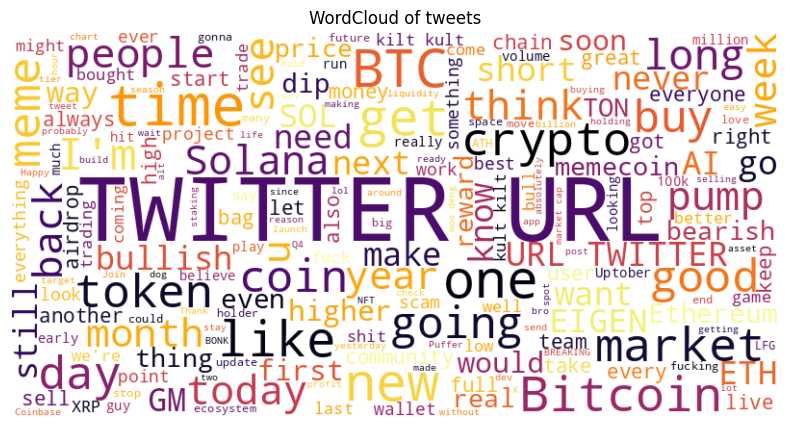

In [ ]:

plot_wordcloud(
    wordcloud_text=get_text(tweets_df),
)


### wordcloud for Eth after cleaning

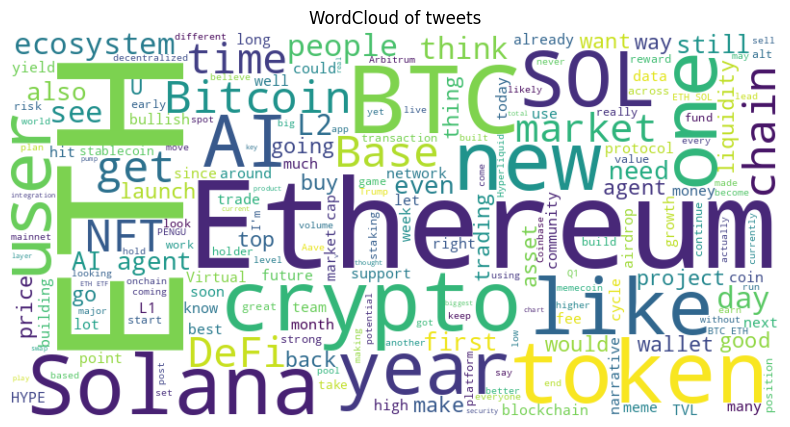

In [ ]:
eth_clean_tweets = eth_df.text.apply(clean)
plot_wordcloud(
    wordcloud_text=get_text(eth_clean_tweets),
)


### Wordcloud for just ETH rows

In [ ]:
eth_df.columns

Index(['id', 'text', 'sentiment_analysis', 'detected_symbols'], dtype='object')

In [ ]:
eth_df.detected_symbols = eth_df.detected_symbols.apply(eval)
def is_eth_alone(symbols):
  return len(symbols) == 1 and symbols[0] == 'ETH'

eth_index = eth_df.detected_symbols.apply(is_eth_alone)
just_eth_tweets = eth_df[eth_index].text.apply(clean)

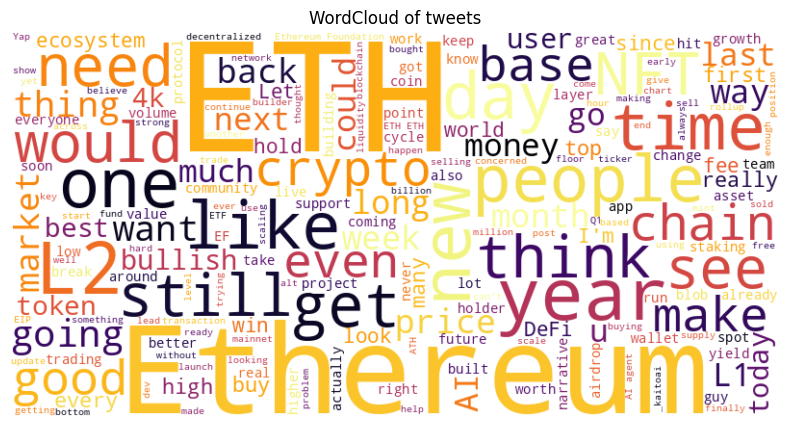

In [ ]:
plot_wordcloud(
    wordcloud_text=get_text(just_eth_tweets),
)

## Split dataset to train-val-test

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# data = pd.read_csv(tweet_path)
data = tweets_df

train_df, val_df = train_test_split(data, test_size=0.3, random_state=135)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=135)

train_df = train_df[['text', 'label']]
val_df = val_df[['text', 'label']]
test_df = test_df[['text', 'label']]

train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)

len(train_df), len(val_df), len(test_df)

(1556, 334, 334)

In [ ]:
print(train_df.label.value_counts())
print(val_df.label.value_counts())
print(test_df.label.value_counts())

label
1    805
2    502
0    249
Name: count, dtype: int64
label
1    167
2    112
0     55
Name: count, dtype: int64
label
1    161
2    120
0     53
Name: count, dtype: int64


## Augmentation

**Due to the dataset's imbalance, I chose an augmentation method using paraphrasing by calling a LLM (*OpenAI gpt-4o-mini*) with a structured output.**
- **The class with the most labels is Neutral, so I focused on augmenting the other classes. I sampled the Bullish class to rephrase and, for each Bearish sample, generated two rephrased versions and added them all together.**

- **To prevent data leakage, I applied augmentation only to the training set.**




In [ ]:
num_bearish_samples = 805 - 249
num_bullish_samples = 805 - 502

num_bearish_samples, num_bullish_samples

(556, 303)

In [ ]:
bullish_to_augment = train_df[train_df.label == 2].sample(n = num_bullish_samples)['text'].to_list()
bearish_to_augment = train_df[train_df.label == 0]['text'].to_list()

In [ ]:
from typing import List, Union, Literal
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI()
LLM_NAME = "gpt-4o-mini-2024-07-18" #, "gpt-4o-2024-08-06" #"gpt-4o-mini-2024-07-18", #, # gpt-4o-mini-2024-07-18
PROMPTS = {
    1: """You are a financial analyst specializing in cryptocurrency markets.
          Rephrase the tweet to match its context and sentiment.""",
    2: """You are a financial analyst specializing in cryptocurrency markets.
          Rephrase the tweet twice uniquely to match its context and sentiment."""
}

class OneRephrasedTweet(BaseModel):
    rephrased_tweet: str

class TwoRephrasedTweet(BaseModel):
    rephrased_tweet: List[str]

def get_rephrased(tweet: str, n: Literal[1, 2]) -> Union[OneRephrasedTweet, TwoRephrasedTweet, None]:
    prompt = PROMPTS.get(n)
    response_format = OneRephrasedTweet if n == 1 else TwoRephrasedTweet
    if not prompt:
        raise ValueError("Invalid value for n. Must be 1 or 2.")

    try:
        completion = client.beta.chat.completions.parse(
            model=LLM_NAME,
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": tweet}
            ],
            response_format=response_format,
            temperature=0.7,
        )

        rephrased_tweet = completion.choices[0].message.parsed
        return rephrased_tweet


    except Exception as e:
        print(f"[ERROR] Failed to rephrase tweet: {e}")
        return None


In [ ]:
## Augmentation for samples of bullish (one rephrased tweet per each)
bullish_rephrased = [get_rephrased(tweet, n=1).rephrased_tweet for tweet in bullish_to_augment]
len(bullish_rephrased)

303

In [ ]:
## Augmentation for samples of bearish (two rephrased tweet per each)
bearish_rephrased_list = [get_rephrased(tweet, n=2).rephrased_tweet for tweet in bearish_to_augment]
bearish_rephrased = [text for rephrased in bearish_rephrased_list for text in rephrased]
len(bearish_rephrased)

498

In [ ]:
augmented_bullish = pd.DataFrame({
    'text':bullish_rephrased,
    'label':[2] * len(bullish_rephrased)
})

augmented_bearish = pd.DataFrame({
    'text':bearish_rephrased,
    'label':[0] * len(bearish_rephrased)
})


print('Shape of bearish augmentation', augmented_bearish.shape)
print('Shape of bullish augmentation', augmented_bullish.shape)

Shape of bearish augmentation (498, 2)
Shape of bullish augmentation (303, 2)


In [ ]:
augmented_df = pd.concat([train_df, augmented_bearish, augmented_bullish], ignore_index=True)
shuffled_df = augmented_df.sample(frac=1, random_state=135).reset_index(drop=True)
shuffled_df

,text,label
0,Keep your crypto safe. In style. 🔐 The limited...,1
1,Think of XRPL as Solana designed for your gran...,0
2,We've got the receipts.,1
3,"With the prospect of WW3 looming, many are liq...",0
4,xrpl is solana but for your grandpa to trade m...,0
...,...,...
2352,Always fade ct consensus💁‍♂,0
2353,Mog is on the rise!,2
2354,This trend is unstoppable!,2
2355,Major memes doing 5x by Christmas would be Dia...,2


In [ ]:
shuffled_df.to_csv(train_aug_path, index=False)
val_df.to_csv(val_aug_path, index=False)
test_df.to_csv(test_aug_path, index=False)

In [ ]:
rephrased_data_path = './data/processed/rephrased_data.csv'
rephrased_data = pd.concat([augmented_bearish, augmented_bullish], ignore_index=True)
rephrased_data.to_csv(rephrased_data_path, index=False)

In [ ]:
shuffled_df.label.value_counts()

,count
label,
1,805
2,805
0,747


**And finally, new dataset seems balanced!**